In [1]:
"""
# CDS-Bond Basis Summary

This notebook summarizes the CDS-Bond Basis dataset, which measures the implied
arbitrage return from the CDS and corporate bond markets as specified in
Siriwardane, Sunderam, and Wallen's "Segmented Arbitrage" paper.

## Methodology

The CDS basis (CB) is defined as:

$$
CB_{i, t, \\tau} = CDS_{i, t, \\tau} - FR_{i, t, \\tau}
$$

Where:
- $FR_{i, t, \\tau}$ = floating rate spread implied by a corporate bond (approximated by Z-spread/credit spread)
- $CDS_{i, t, \\tau}$ = CDS par spread (interpolated using cubic spline)

The implied risk-free rate is:

$$
rfr^{CDS}_{i, t, \\tau} = y_{t, \\tau} - CB_{i , t, \\tau}
$$

Where $y_{t, \\tau}$ is the duration-matched treasury yield.
"""

'\n# CDS-Bond Basis Summary\n\nThis notebook summarizes the CDS-Bond Basis dataset, which measures the implied\narbitrage return from the CDS and corporate bond markets as specified in\nSiriwardane, Sunderam, and Wallen\'s "Segmented Arbitrage" paper.\n\n## Methodology\n\nThe CDS basis (CB) is defined as:\n\n$$\nCB_{i, t, \\tau} = CDS_{i, t, \\tau} - FR_{i, t, \\tau}\n$$\n\nWhere:\n- $FR_{i, t, \\tau}$ = floating rate spread implied by a corporate bond (approximated by Z-spread/credit spread)\n- $CDS_{i, t, \\tau}$ = CDS par spread (interpolated using cubic spline)\n\nThe implied risk-free rate is:\n\n$$\nrfr^{CDS}_{i, t, \\tau} = y_{t, \\tau} - CB_{i , t, \\tau}\n$$\n\nWhere $y_{t, \\tau}$ is the duration-matched treasury yield.\n'

In [2]:
import sys
from pathlib import Path

sys.path.insert(1, "./src/")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chartbook

BASE_DIR = chartbook.env.get_project_root()
DATA_DIR = BASE_DIR / "_data"

In [3]:
"""
## Load Data
"""

'\n## Load Data\n'

In [4]:
# Load FTSFR datasets
agg_df = pd.read_parquet(DATA_DIR / "ftsfr_cds_bond_basis_aggregated.parquet")
non_agg_df = pd.read_parquet(DATA_DIR / "ftsfr_cds_bond_basis_non_aggregated.parquet")

print("=== Aggregated Dataset ===")
print(f"Shape: {agg_df.shape}")
print(f"Date range: {agg_df['ds'].min()} to {agg_df['ds'].max()}")
print(f"Unique IDs: {agg_df['unique_id'].unique().tolist()}")

print("\n=== Non-Aggregated Dataset ===")
print(f"Shape: {non_agg_df.shape}")
print(f"Date range: {non_agg_df['ds'].min()} to {non_agg_df['ds'].max()}")
print(f"Unique CUSIPs: {non_agg_df['unique_id'].nunique()}")

=== Aggregated Dataset ===
Shape: (368, 3)
Date range: 2002-09-30 00:00:00 to 2023-11-30 00:00:00
Unique IDs: ['High Yield', 'Investment Grade']

=== Non-Aggregated Dataset ===
Shape: (532356, 3)
Date range: 2002-09-30 00:00:00 to 2023-11-30 00:00:00
Unique CUSIPs: 15147


In [5]:
"""
## Summary Statistics - Aggregated Data
"""

'\n## Summary Statistics - Aggregated Data\n'

In [6]:
# Pivot to wide format for statistics
agg_wide = agg_df.pivot(index="ds", columns="unique_id", values="y")
print("Aggregated CDS-Bond Basis (Implied Risk-Free Rate, percent)")
print(agg_wide.describe().T)

Aggregated CDS-Bond Basis (Implied Risk-Free Rate, percent)
                  count      mean       std       min       25%       50%  \
unique_id                                                                   
High Yield        184.0  1.389239  1.356521 -1.795430  0.638136  1.451349   
Investment Grade  184.0  2.585308  2.041065 -3.093328  1.720090  3.002103   

                       75%       max  
unique_id                             
High Yield        2.166585  5.836944  
Investment Grade  4.020769  6.191715  


In [7]:
"""
## Summary Statistics - Non-Aggregated Data (Bond-Level)
"""

'\n## Summary Statistics - Non-Aggregated Data (Bond-Level)\n'

In [8]:
print("Non-Aggregated CDS-Bond Basis Statistics")
print(non_agg_df["y"].describe())

Non-Aggregated CDS-Bond Basis Statistics
count    532356.000000
mean          2.419959
std          10.309710
min         -99.974593
25%           1.387730
50%           2.638555
75%           4.428929
max          99.862940
Name: y, dtype: float64


In [9]:
"""
## Time Series Plot - Aggregated by Rating
"""

'\n## Time Series Plot - Aggregated by Rating\n'

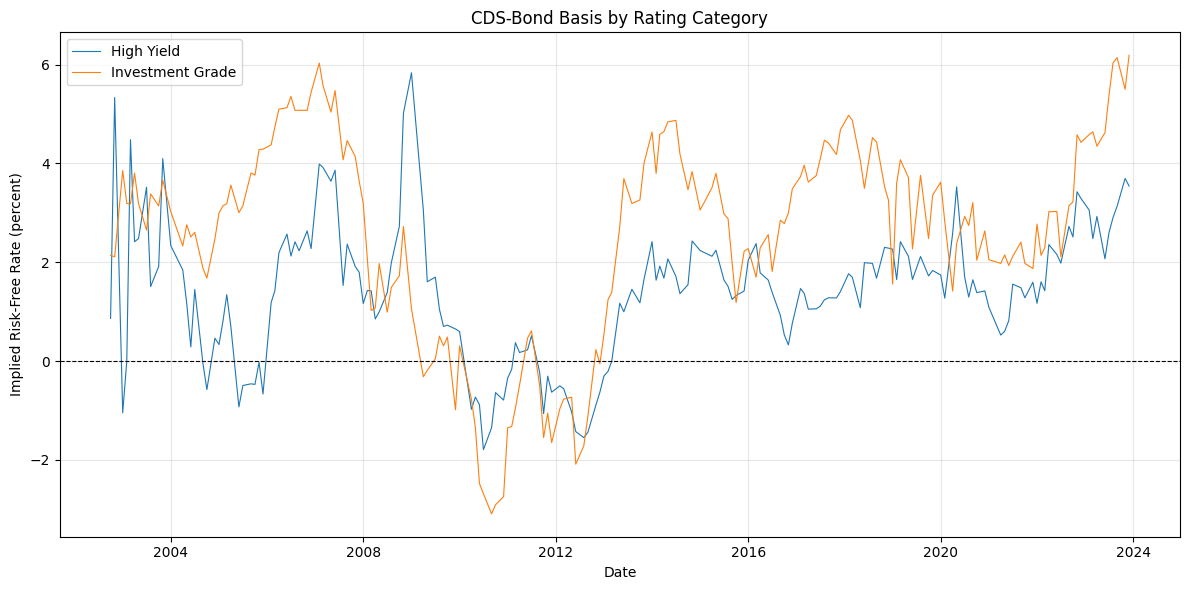

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

for uid in agg_df["unique_id"].unique():
    subset = agg_df[agg_df["unique_id"] == uid].sort_values("ds")
    ax.plot(subset["ds"], subset["y"], label=uid, linewidth=0.8)

ax.axhline(0, color="black", linewidth=0.8, linestyle="--")
ax.set_xlabel("Date")
ax.set_ylabel("Implied Risk-Free Rate (percent)")
ax.set_title("CDS-Bond Basis by Rating Category")
ax.legend(loc="best")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
"""
## Distribution of Implied Risk-Free Rates
"""

'\n## Distribution of Implied Risk-Free Rates\n'

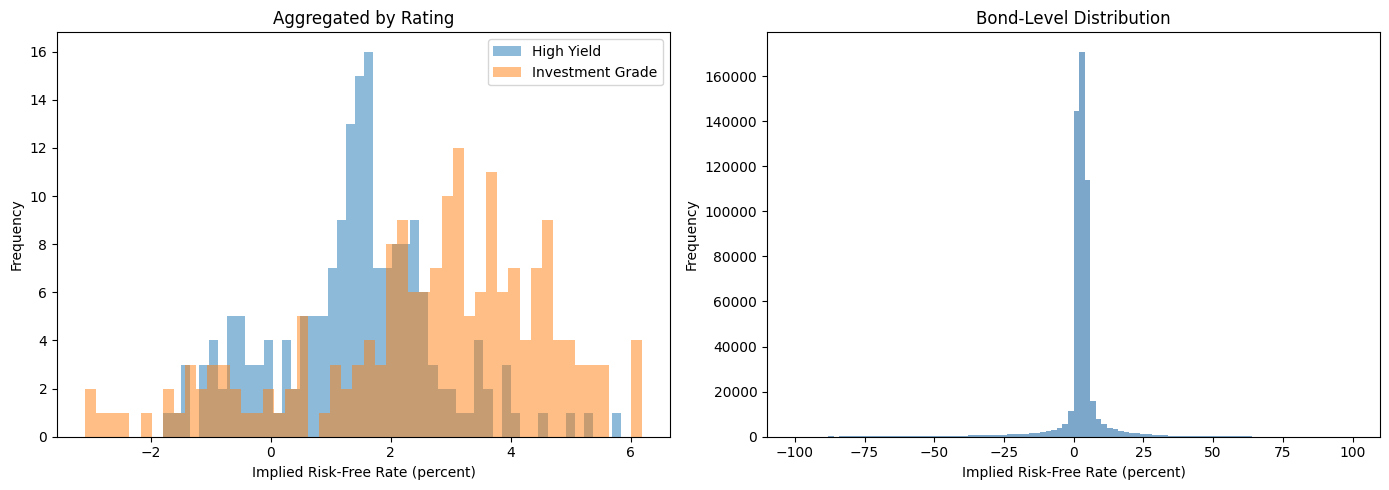

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Aggregated data
for uid in agg_df["unique_id"].unique():
    subset = agg_df[agg_df["unique_id"] == uid]
    axes[0].hist(subset["y"], bins=50, alpha=0.5, label=uid)
axes[0].set_xlabel("Implied Risk-Free Rate (percent)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Aggregated by Rating")
axes[0].legend()

# Non-aggregated data
axes[1].hist(non_agg_df["y"], bins=100, alpha=0.7, color="steelblue")
axes[1].set_xlabel("Implied Risk-Free Rate (percent)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Bond-Level Distribution")

plt.tight_layout()
plt.show()

In [13]:
"""
## Correlation Between Rating Categories
"""

'\n## Correlation Between Rating Categories\n'

Correlation Matrix:
unique_id         High Yield  Investment Grade
unique_id                                     
High Yield           1.00000           0.61154
Investment Grade     0.61154           1.00000


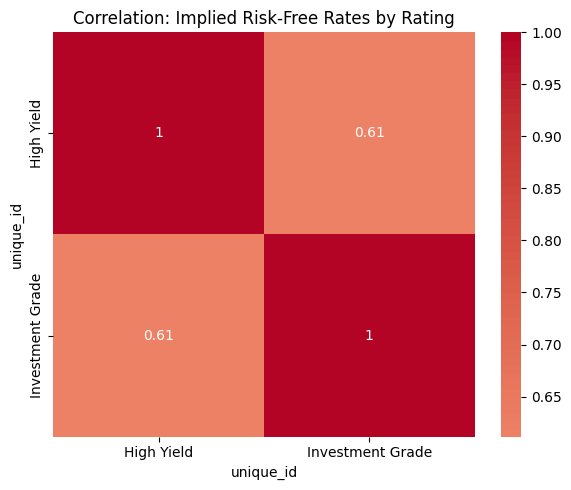

In [14]:
if len(agg_wide.columns) > 1:
    corr_matrix = agg_wide.corr()
    print("Correlation Matrix:")
    print(corr_matrix)

    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, ax=ax)
    ax.set_title("Correlation: Implied Risk-Free Rates by Rating")
    plt.tight_layout()
    plt.show()

In [15]:
"""
## Monthly Statistics Over Time
"""

'\n## Monthly Statistics Over Time\n'

In [16]:
# Create monthly summary
agg_df["ds"] = pd.to_datetime(agg_df["ds"])
agg_df["month"] = agg_df["ds"].dt.to_period("M")

monthly_stats = agg_df.groupby(["month", "unique_id"])["y"].agg(["mean", "std", "count"]).reset_index()
print("Monthly statistics by rating:")
print(monthly_stats.tail(20))

Monthly statistics by rating:
       month         unique_id      mean  std  count
348  2022-11        High Yield  3.290949  NaN      1
349  2022-11  Investment Grade  4.427989  NaN      1
350  2023-01        High Yield  3.057994  NaN      1
351  2023-01  Investment Grade  4.584639  NaN      1
352  2023-02        High Yield  2.479028  NaN      1
353  2023-02  Investment Grade  4.640628  NaN      1
354  2023-03        High Yield  2.928783  NaN      1
355  2023-03  Investment Grade  4.350312  NaN      1
356  2023-05        High Yield  2.070046  NaN      1
357  2023-05  Investment Grade  4.624549  NaN      1
358  2023-06        High Yield  2.593905  NaN      1
359  2023-06  Investment Grade  5.366028  NaN      1
360  2023-07        High Yield  2.904122  NaN      1
361  2023-07  Investment Grade  6.035084  NaN      1
362  2023-08        High Yield  3.133236  NaN      1
363  2023-08  Investment Grade  6.144073  NaN      1
364  2023-10        High Yield  3.696961  NaN      1
365  2023-10  In

In [17]:
"""
## Data Quality Check
"""

'\n## Data Quality Check\n'

In [18]:
print("=== Aggregated Dataset ===")
print(f"Missing values: {agg_df['y'].isna().sum()}")
print(f"Infinite values: {(~agg_df['y'].apply(lambda x: -1e10 < x < 1e10)).sum()}")

print("\n=== Non-Aggregated Dataset ===")
print(f"Missing values: {non_agg_df['y'].isna().sum()}")
print(f"Infinite values: {(~non_agg_df['y'].apply(lambda x: -1e10 < x < 1e10)).sum()}")

=== Aggregated Dataset ===
Missing values: 0
Infinite values: 0

=== Non-Aggregated Dataset ===
Missing values: 0
Infinite values: 0
